In [2]:
import pandas as pd

df = pd.read_csv('sample_data/Mall_Customers.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# ubah nama column
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'})

# ubah kategorik menjadi numerik
df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

# tampilkan data
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [14]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
x = df.drop(['CustomerID', 'gender'], axis=1)

clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

clusters

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75479.76429338777,
 58300.44332159069,
 51098.58740856845,
 44344.94980177718,
 40901.25690143189,
 37887.273364553956]

Text(0, 0.5, 'Inertia')

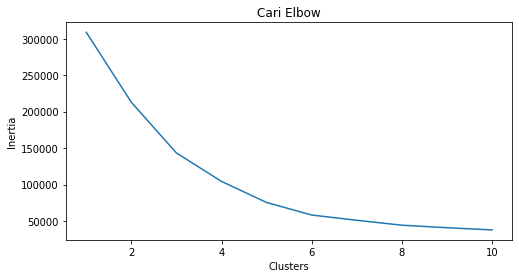

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

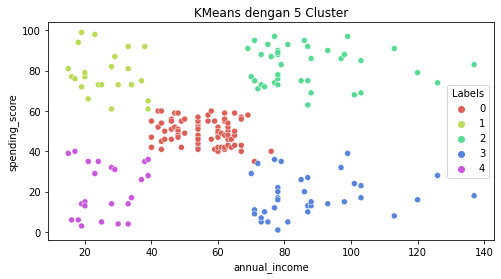

In [19]:
km5 = KMeans(n_clusters=5).fit(x)

x['Labels'] = km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Labels'], palette=sns.color_palette('hls', 5))

plt.title('KMeans dengan 5 Cluster')
plt.show()